## Homework 3

## <em> Bayesian Statistics, Numerical Differentiation, and Optimization Methods</em>
<br>

Homework Guidelines:

1) Document your code! Only part of your score on the homework will be if you get the "right" answer. In order for us to understand what you've written, you need to have clearly written code. Documenting your code with comments (# sign) and spacing out your code (but not too much) makes it easier to read. You should also make use of the markdown feature of ipython notebooks for longer explanations or to imbed pictures/formulas.

2) You may google around for tools for solving the homework problems (StackExchange will often pop up!) but DO NOT google the exact problem statement or copy blocks of code from elsewhere.

3) You can work in small groups to complete assignments and share code within the small group. Please specify who you worked with if your submitted solutions are similar/identical.

4) Various python packages have built in routines for common programming tasks. If you want to use an external (i.e. import X) package which isn't imported in the problem statement please ask the instructor first.

5) Some problem statements might be vague or unspecific (like "Explore the relationship between X and Y"), just like real research questions! When in doubt it would be useful to provide plots and your observations. Show what you did graphically whenever possible.

6) Run all cells before you commit!


<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

## Problem 1 - A Trip to Yosemite (10 Points)

You take a trip to Yosemite Valley and you see 4 bears, 2 eagles, and 1931 tourists. 

a) Assuming that our sample is representative, estimate the prevalence of each species in the Yosemite ecosystem numerically. (Hint, it is similar to our avocado question!)

b) Of course, your sample isn't very representative as you only visited Yosemite Valley, which holds 99% of all the tourists (Although it is representative of the bears and eagles). Below is a map of Yosemite. Use it to update your posterior on number the overall number density of bears, eagles and tourists in Yosemite.


Hint; You can use the color information to create filters to figure out how many pixels are in Yosemite Valley (the green area). You can also use the grid lines to estimate how many pixels are outside the border of Yosemite (the black outline); this can be a very rough estimate.


Populating the interactive namespace from numpy and matplotlib


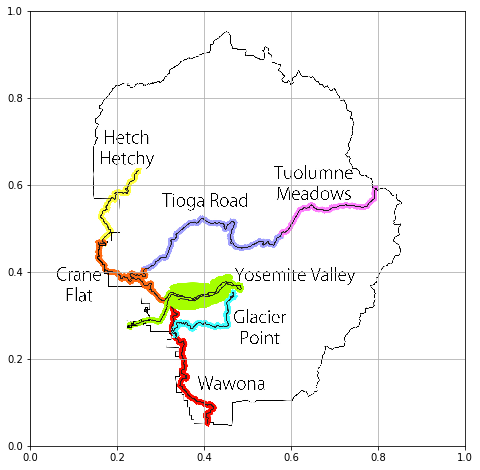

In [31]:
%pylab inline

plt.figure(figsize = (8, 8))


img = mpimg.imread("Yosemite-Regions.png")
plt.imshow(img[:,:],zorder=0, extent=[0, 1.0, 0, 1.0])
plt.grid()


## Problem 2 - Biased Coin (10 Points)

(From Uros Seljak)

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair? <br>
<br>
We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. <br>
<br>
First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$. <br>
<br>
Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. <br>
<br>
Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$
<br>
Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html) <br>
<br>
The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$ <br> <br>
$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$
<br>
Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$
<br>


 a) Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor? <br>
<br>
(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:
$$ log(xy/z) = log(x)+log(y)-log(z) $$ <br>
Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:
$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$
<br>
You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)<br>
<br>
(Hint2: For reference, you can read: https://en.wikipedia.org/wiki/Bayes_factor)

In [ ]:
F = ...; F_H = ...; F_T = F - F_H

from math import factorial, log, exp, lgamma

Likelihood_H1 = ...
Likelihood_H0 = ...

ratio = ...

print("The likelihood ratio is = ", ratio)
print("The data give evidence in favor of ...")

Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: <br>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
b) Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. 


In [ ]:
alpha = ...

def likelihood_ratio(F_H, F_T, alpha):
    ...
    return ...

ratio = np.zeros_like(alpha)
for i in range(len(alpha)):
    ratio[i] = likelihood_ratio(F_H, F_T, alpha[i])

print("For alpha = ", alpha, ", the likelihood ratios are = ", np.around(ratio, decimals=2), "respectively.")

## Problem 3 - Optimization or Random Sampling (15 Points)

In lecture we found the optimal point for the noisy simple harmonic oscillator dataset using a markov chain monte carlo method. In this assignment, we will perform the similar optimization using a simple gradient descent algorithm.

Recall that gradient descent uses the gradient information to 'roll down the hill' towards the correct solution. (Look back at lecture 4 on day 5 for a simple example)


a) Plot the data and best fit line from ./hooks_law.txt. Remember to make your plot pretty!

In [ ]:
d_out = np.genfromtxt("./hooks_law.txt")

... #your plotting here!

b) Implement a simple first order method to find the optimal parameters given a random starting location. Use the below chi-squared formula. 

$\chi^2 = \sum_i (\bar{n}_i-n_i)^2/\sigma$

(Hint: you can treat all 3 free parameters (x_0, k, b) as independent directions, but you must optimize them all at the same time)

In [ ]:
def chi_squared(data,parameter_guess):
    x_0,v_0,k,b,m = parameter_guess
    t_array = data[:,0]
    x_experiment = data[:,1]
    x_guess = np.array([true_motion(t,x_0,v_0,k,b,m) for t in t_array])
    
    chi_squared = np.power((x_guess - x_experiment),2)/0.04
    
    return np.sum(chi_squared)

def true_motion(t,x_0,v_0,k,b,m):
    w0 = sqrt(k/m)
    b0 = b/m
    
    if b0**2.-4.*w0**2.>0:
        raise NameError("Not underdamped system! "+ str(b0**2.-4.*w0**2.) )
        
    gamma = 1/2. *sqrt(4*w0**2. - b0**2.)
    
    A = x_0
    B = v_0 + 1/2.*gamma*x_0
    return (A*cos(t*gamma)+B*sin(t*gamma))*exp(-b0*t/m)


#true values (to compare to in the end)
k = 8.25 #spring constant
sigma_x = 0.04 #uncertainty in the x measurement
x_0 = 0.5 #staring position
v_0 = 0.0 #starting velocity
b = 4. #damping
m = 10. #mass

#your optimization here

c) Now, instead of a first order method, lets use a second order method (i.e. Newton's Method). Here at each iteration we update based on the following formula;

$x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})}$

You will need to code up a second derivative calculator, like we did in class.

In [ ]:
... #your code here!

d) Compare the speed perfomance of each function. Which one is faster? Which one has fewer calls to "true motion"?

## Problem 4 - Simulated Annealing (15 Points)

(From Uros Seljak)

Optimal Reference: Newman, Computational Physics (p. 490-497)<br><br>

For a physical system in equilibrium at temperature $T$, the probability that at any moment the system is in a state $i$ is given by the Boltzmann probability. Let us assume our system has single unique ground state and let us choose our energy scale so that $E_i = 0$ in the ground state and $E_i > 0$ for all other states. Now suppose we cool down the system to absolute zero. The system will definitely be in the ground state, and consequently one way to find the ground state of the system is to cool it down to $T = 0$.
<br><br>
This in turn suggests a computational strategy for finding the ground state: let us simulate the system at temperature $T$, using the Markov chain Monte Carlo method, then lower the temperature to zero and the system should find its way to the ground state. This same approach could be used to find the minimum of any function, not just the energy of a physical system. we can take any mathematical function $f(x, y, z, ...)$ and treat the independent variables $x, y, z$ as defining a "state" of the system and $f$ as being the energy of that system, then perform a Monte Carlo simulation. Taking the temperature down to zero will again cause the system to fall into its ground state, i.e. the state with the lowest value of $f$, andhence we find the minimum of the function.
<br><br>
However, if the system is cooled rapidly, it can get stuck in a local energy minimum. On the other hand, an annealed system, one that is cooled sufficiently slowly, can find its way to the ground state. Simulated annleaing applies the same idea in a computational setting. It mimics the slow cooling of a material on the computer by using a Monte Carlo simulation with a temperature parameter that is gradually lowered from an initially high value towards zero. The initial temperature should be chosen so that the system equilibrates quickly. To achieve this, we should choose the thermal energy to be significantly greater than the typical energy change accompanying a single Monte Carlo move. 
<br><br>
As for the rate of cooling, one typically specifies a "cooling schedule," a trajectory for the temperature as a function of time, and the most common choice is the exponential one:
<br><br>
$$ T = T_0 e^{-t/\tau} $$
<br><br>
where $T_0$ is the initial temperature, and $\tau$ is a time constant. Some trial error may be necessary to find a good value for $\tau$. 
<br><br>
As an example of the use of simulated annealing, we will look at one of the most famous optimization problems, traveling salesman problem, which involves finding the shortest route that visits a given set of locations on a map. A salesman wishes to visit $N$ given cities, and we assume that he can travel in a straight line between any pair of citiies. Given the coordinates of the cities, the problem is to devise the shortest tour. It should start and end at the same city, and all cities must be visited at least once. Let us denote the position of the city $i$ by the two-dimensional vector $r_i = (x_i, y_i)$.
<br><br>
Here is the solution:


Populating the interactive namespace from numpy and matplotlib


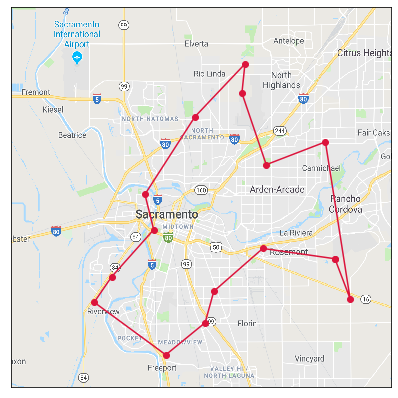

In [10]:
# Traveling salesman (Newman p. 493)
from math import sqrt,exp
from numpy import empty
from random import random,randrange
import matplotlib.image as mpimg

%pylab inline
N = 15
R = 0.02
Tmax = 10.0
Tmin = 1e-4
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random.random()
    r[i,1] = random.random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random.random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

plt.figure(figsize = (8, 7))

img = mpimg.imread("map_sacramento.png")
plt.plot(r[:,0], r[:,1], 'o-', color = 'crimson', zorder=1)
plt.imshow(img,zorder=0, extent=[-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
plt.show()

Now, consider the function $f(x) = x^2 − \mathrm{cos}(4\pi x)$, which looks like this:

Populating the interactive namespace from numpy and matplotlib


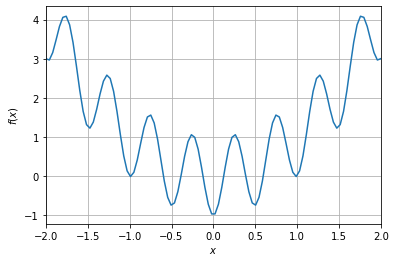

In [2]:
%pylab inline
x = np.linspace(-2, 2, 100)
y = x**2 - np.cos(4*np.pi*x)
plt.plot(x, y)
plt.grid(True); plt.xlim(-2, 2); plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

Clearly the global minimum of this function is at $x = 0$.

a) Write a program to confirm this fact using simulated annealing starting at, say, $x = 2$, with Monte Carlo moves of the form $x \rightarrow x + \delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of x at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form plot(x,".") or similar.

In [ ]:
...

b. Now adapt your program to find the minimum of the more complicated function $f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x) + \mathrm{cos}(\sqrt{3}x)$ in the range $0 < x < 50$. </i></span><br><br>
(Hint: The correct answer is around $x = 16$, but there are also competing minima around $x = 2$ and $x = 42$ that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.)

In [ ]:
...